In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from numba import jit
import pandas as pd

def modlin(x,a,b):
    return a*x+b

l=pd.read_csv('6340120_Q_Day.Cmd.txt',sep='   ')
Values=np.array([np.float64(i) for i in l['YYYY-MM-DD;hh:mm; Value']])
Values=Values[np.logical_not(np.isnan(Values))]

/tmp/ipykernel_23871/122925415.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  l=pd.read_csv('6340120_Q_Day.Cmd.txt',sep='   ')


# (a)

194.63301616260847
203.78980912394368
203.93161406136826


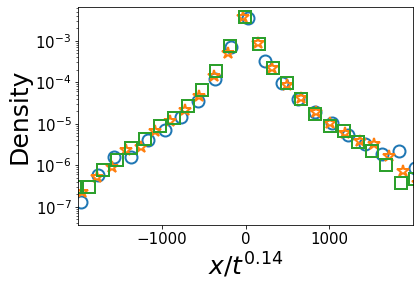

In [4]:
H=0.14
from scipy.stats import norm
i=0
Marker=['o','*','s','p']

for t in [10,20,40]:
    X=[]
    for ini in range(0,len(Values)-t):
        x0=Values[ini]
        X.append(Values[ini+t]-x0)
    print(np.std(X)/t**H)
    h,bins=np.histogram(np.array(X)/t**H,density=True,bins=36)
    bins=(bins[1:]+bins[:-1])/2
    plt.plot(bins,h,Marker[i],markersize=12,linestyle='',fillstyle='none',linewidth=20,markeredgewidth=2.0)
    i+=1
#Xl=np.linspace(-10,10,1000)
#plt.plot(Xl,norm.pdf(Xl,0,1),'--k',linewidth=2)
#plt.ylim(1e-5,1e-2)
plt.xlim(-2000,2000)
plt.xticks([-1000,0,1000],fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(r'$x/t^{0.14}$',fontsize=25)
plt.ylabel('Density',fontsize=25)
plt.semilogy()
#plt.savefig('Flux_Dresden.svg')
plt.show()    

# (a')

781


[]

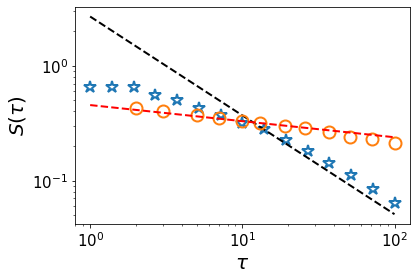

In [9]:

@jit(nopython=True)
def tau(V):
    tau=0
    M=V[0]
    while tau<len(V) and V[tau]<=M:
        tau+=1
    return tau

##
T=[]
T0=np.logspace(0,2,15)
C=np.zeros(len(T0))
F=np.zeros(len(T0))

for k in range(0,len(Values)-2):
    t=tau(Values[k:])
    C[T0<(len(Values)-k)]+=1
    F[T0<t]+=1

F/=C
##
from numba import jit
@jit(nopython=True)
def tau(V):
    T=[]
    M=V[0]
    tau=1
    for k in range(1,len(V)-1):
        if V[k]>M:
            T.append(tau)
            tau=1
        else:
            tau+=1
        M=max(V[k],M)
    return T

T=[]

#for k in range(len(Indices)-5):
#  T+=list(tau(Values[Indices[k]:Indices[k+5]]))
#print(len(T))

T=[]
epochs=100
print(len(Values)//epochs)
for k in range(0,len(Values),len(Values)//epochs):
  T+=tau(Values[k:])[1:]

@jit(nopython=True)
def FreCum(T,Tl):
    S=[]
    for t in Tl:
        S.append(np.sum(T>=t)/len(T))
    return S

##
Tl=np.unique(np.int64(np.logspace(0,2,15)))
Tl=np.float64(Tl)

dw=1/H
i=0
Marker=['*','o','s','p']


plt.plot(T0,F,Marker[i],markersize=12,linestyle='',fillstyle='none',linewidth=20,markeredgewidth=2.0)
plt.plot(T0,(T0/T0[8])**(-1+H)*F[8],'--k',linewidth=2)
i+=1


S=np.array(FreCum(np.array(T),Tl))



plt.plot(Tl[1:],S[1:],Marker[i],markersize=12,linestyle='',fillstyle='none',linewidth=20,markeredgewidth=2.0) 

plt.plot(Tl,(Tl/Tl[5])**(-H)*S[5],'--r',linewidth=2)



plt.semilogx()
plt.semilogy()

plt.xlabel(r'$\tau$',fontsize=20)
plt.ylabel(r'$S(\tau)$',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.semilogx()
plt.semilogy()

#plt.savefig('Records_Desden.svg')